### Notebook 2_5

## Steady State Sine Response — Phasor

#### Student Learning Outcomes
* Learn the usage of phasor.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Phasor Notation</h2>
</div>


Recall in the last notebook, there is such conclusion:

For any order system, this holds:

**For a sine input:**
$$x(t)=A\sin(\omega t)$$

**Goes into a any order system:**
$$H(s)$$

The **steady state of the output** as:
$$y(t) =A \times |H(j\omega)| \sin(\omega t+ \angle (H(j\omega))) $$

--------

In Electrical Engineering, when working with **steady state sine response**, engineers may deal with multiple inputs or multiple systems. Directly writing such math expressions tedious. 

Instead of using such full trigonometric expression,engineers use simplied notation, **Phasor**. **Phasor** follows the same math before, but can simplify writing and analysis.  

----------
**Assumption:** we only study the **steady state response of sine signals**. Everything are at the **same frequency $\omega$**
* **Notation 1:** Any sine wave $$A \sin(\omega t+\phi)$$ can be written as:
  $$A\angle \phi$$
  $\phi$ should be written as degrees, not radians.
* **Notation 2:** A sine wave passes thru a system in transfer function $H(s)$, the effect of the system can be written as:
  $$|H(j\omega)|\angle H(j\omega)$$
* **Calculation:** Phasor notation makes multiply/divide very simple:
  $$(A_1 \angle \phi_1) \times (A_2 \angle \phi_2)=(A_1 A_2) \angle (\phi_1 + \phi_2)$$


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Practice with Single Input, Single System</h2>
</div>


-------------
**Example**
  * Input: $x(t)=10\sin(5 t)$
  * System: $H(s)=\frac{3}{s+0.5}$

If we use Phasor notation:
* Input phasor: $X=10\angle 0$
* System transfer function phasor: $H =|H(5j)|\angle H(5j)$

In [2]:
jw = 5j
H_jw = 3/(jw + 0.5)
print(np.abs(H_jw))
print(np.angle(H_jw))
# use degree for phasor
print(np.angle(H_jw, deg=True))

0.5970223141259934
-1.4711276743037345
-84.28940686250036


* After plugging numbers, System transfer function phasor: $H=0.597\angle (-84.3 deg)$
* Recall $\text{Transfer Function}=\dfrac{\text{Output}}{\text{Input}}$, so their corresponding phasors hold the same relationship.
* Thus, we can direct get the output phasor by:
  $$Y = (10\angle 0)\times{0.597\angle (-84.3 deg)} = (10\times 0.597)\angle(0-84.3 deg) = 5.97\angle (-84.3 deg)$$
* With phasor notation of output $Y$, we can directly write down the steady state response of $y(t)$
  $$y(t)_{ss} = 5.97\sin(5 t-84.3 deg)$$

**Practice**
  
  * Input: $x(t)=5\sin(2 t + 30 deg)$ 
  * System: $H(s)=\frac{5}{s^2+2s+7}$
    
Use Phasor notation to solve for steady state output $y(t)_{ss}$

* Input Phasor: $X = ??$
* System transfer function phasor: $H = ??$

In [3]:
## Use Python to calculate ..
## print your result of Mag and Angle
jw_2 = 2j
H_jw_2 = 5/(jw_2*jw_2 + 2*jw_2 + 7)
print(np.abs(H_jw_2))
print(np.angle(H_jw_2))
# use degree for phasor
print(np.angle(H_jw_2, deg=True))

1.0
-0.9272952180016123
-53.13010235415599


**Answer**
* Input Phasor  $5\angle 30 deg$
* Transfer function Phasor $H =|H(2j)|\angle H(2j)$

* After plugging numbers, System transfer function phasor: $1 \angle -53.1 deg$
* Thus, we can direct get the output phasor by:
  $$Y =5\angle -23.1 deg$$
* With phasor notation of output $Y$, we can directly write down the steady state response of $y(t)$
  $$y(t)_{ss} = 5\sin(2t-23.1 deg)$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Fill the blank: 1.5 pt</strong>
</span>

Based on your result, plot two in 1 figure
* your calculated $y(t)_{ss}$
* the $y(t)$ using ```scipy.signal.lsim``` plot

If everything is correct, your final 2 signals will overlap in steady state.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1.5 pt</strong>
</span>

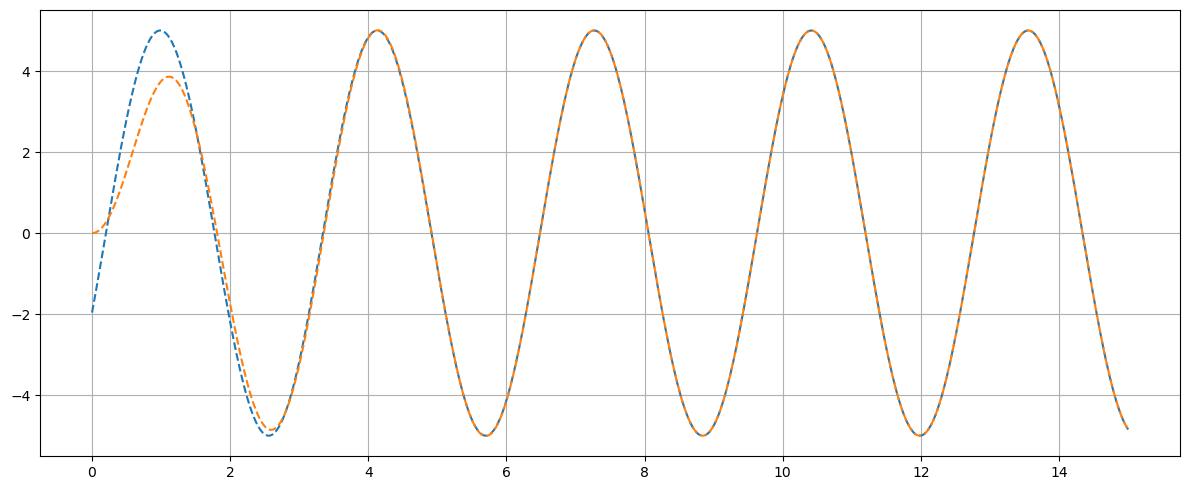

In [11]:
t_task2 = np.linspace(0, 15, 1000)

y_task2_plt1 = 5*np.sin(2*t_task2-np.deg2rad(23.1))

x_task2 = 5*np.sin(2*t_task2+np.deg2rad(30))
H_task2 = sig.lti([5] , [1, 2, 7])
_, y_task2_plt2, _ = sig.lsim(H_task2, U=x_task2 , T=t_task2)

plt.figure(figsize=(12, 5))
plt.plot(t_task2, y_task2_plt1, '--')
plt.plot(t_task2, y_task2_plt2, '--')
plt.grid(True)
plt.tight_layout()

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Phasor Notation for Cascaded Systems</h2>
</div>


The advantage of phasor notation becomes more obvious when dealing with cascade systems, where multiple systems are connected in series.

Sine signals into cascade systems can be commonly seen in cascaded electrical filters, cascaded mechanical suspensions, cascaded audio equalizers, ...

**Practice**
  
  * Input: $x(t)=8\sin(3 t)$ 
  * System1: $H(s)=\dfrac{4}{s+2}$
  * System2: $H(s)=\dfrac{3}{s+5}$
  * System 1 and System 2 are cascaded
Use Phasor notation to solve for steady state output $y(t)_{ss}$

* Input Phasor: $X = ??$
* System 1 transfer function phasor: $H_1 = ??$
* System 2 transfer function phasor: $H_2 = ??$

In [12]:
## Use Python to calculate ..
## for H_1 and H_2, respectively
## print your result of Mag and Angle
jw_task3 = 3j

H_jw_task3_1 = 4/(jw_task3 + 2)
print(np.abs(H_jw_task3_1))
print(np.angle(H_jw_task3_1))
# use degree for phasor
print(np.angle(H_jw_task3_1, deg=True))


H_jw_task3_2 = 3/(jw_task3 + 5)
print(np.abs(H_jw_task3_2))
print(np.angle(H_jw_task3_2))
# use degree for phasor
print(np.angle(H_jw_task3_2, deg=True))

1.1094003924504583
-0.982793723247329
-56.309932474020215
0.5144957554275265
-0.5404195002705842
-30.96375653207352


* After plugging numbers, System 1 transfer function phasor: $H_1=???$
* After plugging numbers, System 2 transfer function phasor: $H_2=???$
* Thus, we can direct get the output phasor by:
  $$Y =???$$
* With phasor notation of output $Y$, we can directly write down the steady state response of $y(t)$
  $$y(t)_{ss} = ???$$

**Answer**
* $H_1 = 1.11\angle -56 deg$
* $H_2 = 0.514\angle -31 deg$
* $Y = (8\times 1.1\times 0.51)\angle (0-56-31) deg = 4.56\angle -87 deg$
* $y(t)_{ss}=4.56\sin(3t -87 deg)$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Fill the blank: 2 pt</strong>
</span>

<div style="border-left: 4px solid #008080; padding: 10px; background-color: #E5FFFF;">
<strong>[Note: ]</strong> If you want to double-check your result, you can always plot the math expression versus the Scipy lsim plot.
</div>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


